In [5]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
# shutil is a Python module for high-level file and collection utilities.
# Overview
# shutil provides functions for:
# Copying files and directories
# Moving and renaming files and directories
# Removing files and directories
# Archiving and compressing files

# https://www.youtube.com/watch?v=XoTwndOgXBM&list=PLmGsNPZGeM5D8fgr2scwe8wZih4SYB7Vt&index=19
# https://www.youtube.com/results?search_query=+microservice+with+machine+learning+ai+project

# https://www.youtube.com/playlist?list=PLSrTvUm384I9PV10koj_cqit9OfbJXEkq

# https://www.youtube.com/watch?v=I7cDu6IaN7c&list=PLfP3JxW-T70GzK_mU0oWYbnMhjWbVc2O5
# https://www.youtube.com/watch?v=wBd2TN4BP8A&list=PLWO1vff-jJQ8QTkAtS9J1kcr4zTcWHGYs
# https://www.youtube.com/watch?v=P6m2Z8WdsBk

In [2]:
print(tf.__version__)

2.18.0


Sentiment analysis

In [2]:
import os

In [3]:
os.path

<module 'ntpath' (frozen)>

These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [6]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')



84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [14]:
dataset

'.\\aclImdb_v1'

In [30]:
folder_dir = os.path.join(os.path.dirname(dataset),'aclImdb_v1')

In [31]:
os.listdir(folder_dir)

['aclImdb']

In [21]:
dataset_dir = os.path.join(os.path.dirname(dataset),'aclImdb_v1','aclImdb')

In [22]:
dataset_dir

'.\\aclImdb_v1\\aclImdb'

In [23]:

os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [24]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [27]:

sample_files = os.path.join(train_dir, 'pos')
os.listdir(sample_files)

['0_9.txt',
 '10000_8.txt',
 '10001_10.txt',
 '10002_7.txt',
 '10003_8.txt',
 '10004_8.txt',
 '10005_7.txt',
 '10006_7.txt',
 '10007_7.txt',
 '10008_7.txt',
 '10009_9.txt',
 '1000_8.txt',
 '10010_7.txt',
 '10011_9.txt',
 '10012_8.txt',
 '10013_7.txt',
 '10014_8.txt',
 '10015_8.txt',
 '10016_8.txt',
 '10017_9.txt',
 '10018_8.txt',
 '10019_8.txt',
 '1001_8.txt',
 '10020_8.txt',
 '10021_8.txt',
 '10022_7.txt',
 '10023_9.txt',
 '10024_9.txt',
 '10025_9.txt',
 '10026_7.txt',
 '10027_7.txt',
 '10028_10.txt',
 '10029_10.txt',
 '1002_7.txt',
 '10030_10.txt',
 '10031_10.txt',
 '10032_10.txt',
 '10033_10.txt',
 '10034_8.txt',
 '10035_9.txt',
 '10036_8.txt',
 '10037_9.txt',
 '10038_10.txt',
 '10039_10.txt',
 '1003_10.txt',
 '10040_10.txt',
 '10041_10.txt',
 '10042_10.txt',
 '10043_10.txt',
 '10044_9.txt',
 '10045_10.txt',
 '10046_9.txt',
 '10047_10.txt',
 '10048_10.txt',
 '10049_8.txt',
 '1004_7.txt',
 '10050_10.txt',
 '10051_10.txt',
 '10052_10.txt',
 '10053_8.txt',
 '10054_10.txt',
 '10055_7.tx

In [28]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')

In [29]:
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [32]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

When running a machine learning experiment, it is a best practice to divide your dataset into three splits: train, validation, and test.

The IMDB dataset has already been divided into train and test, but it lacks a validation set. Let's create a validation set using an 80:20 split of the training data by using the validation_split argument below.


batch_size = 32

To prepare a dataset for binary classification, you will need two folders on disk, corresponding to class_a and class_b. These will be the positive and negative movie reviews, which can be found in aclImdb/train/pos and aclImdb/train/neg. As the IMDB dataset contains additional folders, you will remove them before using this utility

In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training', # set as training data
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [35]:
raw_train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

As you can see above, there are 25,000 examples in the training folder, of which you will use 80% (or 20,000) for training. As you will see in a moment, you can train a model by passing a dataset directly to model.fit

In [36]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [37]:
for text_batch, label_batch in raw_train_ds.take(1):
    print("Text:", text_batch[:5])
    print("Label:", label_batch[:5])

Text: tf.Tensor(
[b"Having seen most of Ringo Lam's films, I can say that this is his best film to date, and the most unusual. It's a ancient china period piece cranked full of kick-ass martial arts, where the location of an underground lair full of traps and dungeons plays as big a part as any of the characters. The action is fantastic, the story is tense and entertaining, and the set design is truely memorable. Sadly, Burning Paradise has not been made available on DVD and vhs is next-to-impossible to get your mitts on, even if you near the second biggest china-town in North America (like I do). If you can find it, don't pass it up."
 b'Caution: May contain spoilers...<br /><br />I\'ve seen this movie 3 times & I\'ve liked it every time. Upon seeing it again, I\'m always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would\'ve gotten Oscars for it\'s performances had it been released for general distribution instead of made for TV.<br 

In [38]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


Notice the reviews contain raw text (with punctuation and occasional HTML tags like <br/>). You will show how to handle these in the following section.

In [40]:

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation', # Use the 20% of data for validation
    seed=seed) #In machine learning, a seed is a numerical value used to initialize the random number generator (RNG) for reproducibility

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [41]:
test_dir = os.path.join(dataset_dir, 'test')

label automatically generated based on directory neg and pos

In [42]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


Prepare the dataset for training

Next, you will standardize, tokenize, and vectorize the data using the helpful tf.keras.layers.TextVectorization layer.

Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset. 

Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace)

Vectorization refers to converting tokens into numbers so they can be fed into a neural network. All of these tasks can be accomplished with this layer.

In [43]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  #This line of code uses TensorFlow's tf.strings.regex_replace function to replace HTML line breaks (<br />) with spaces in a string tensor.
  return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')
#re.escape() escapes special characters in the punctuation string, ensuring they're treated as literal characters in the regex pattern.
# The pattern [%s] matches any single character in the escaped punctuation string.

In [45]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

Next, you will create a TextVectorization layer. You will use this layer to standardize, tokenize, and vectorize our data. You set the output_mode to int to create unique integer indices for each token.

Note that you're using the default split function, and the custom standardization function you defined above. You'll also define some constants for the model, like an explicit maximum sequence_length, which will cause the layer to pad or truncate sequences to exactly sequence_length values.

In [46]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x) #  convert x, y to only x
vectorize_layer.adapt(train_text)

In [47]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [48]:
text_batch, label_batch = next(iter(raw_train_ds))

In [51]:
text_batch[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.'>

In [50]:
text_batch

<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.',
       b"I am shocked. Shocked and dismayed that the 428 of you IMDB users who voted before me have not given this film a rating of higher than 7. 7?!?? - that's a C!. If I could give FOBH a 20, I'd gladly do it. This film ranks high atop the pantheon of modern comedy, alongside Half Baked and Mallrats, as one of the most hilarious films of all time. If you know _anything_ about rap music - YOU MUST SEE THIS!! If you know nothing about rap music - learn something!, and then see this! Comparisons to 'Spinal Tap' fail to appreciate the inspired genius of this unique film. If you liked Bob Roberts, you'll love this. Watch it and vote it a 10!",
       b'What a lovely heart warming television movie. The story tells of a little five year old girl who has lost her daddy and finds it impossible to cope. Her 

In [52]:
label_batch[0]

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [53]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)>

In [54]:
raw_train_ds.class_names[label_batch[0]]

'neg'

In [55]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Belmondo is a tough cop. He goes after a big-time drug dealer (played by Henry Silva, normally a great villain - see "Sharky\'s Machine"; but here he is clearly dubbed, and because of that he lacks his usual charisma). He goes to the scuzziest places of Paris and Marseilles, asks for some names, beats up some people, gets the names, goes to more scuzzy places, asks for more names, beats up more people, etc. The whole movie is punch after punch after punch. It seems that the people who made it had no other ambition than to create the French equivalent of "Dirty Harry". Belmondo, who was 50 here, does perform some good stunts at the beginning; apart from those, "Le Marginal" is a violent, episodic, trite, shallow and forgettable cop movie. (*1/2)', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,    7,    4, 1233, 1021,   27,  261,  101,    4,    1, 1525,
        6992,  248,   32, 1488,    1, 1659,    4,

In [56]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [57]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

Configure the dataset for performance
These are two important methods you should use when loading data to make sure that I/O does not become blocking.

.cache() keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.

In [58]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the model

In [ ]:
embedding_dim = 16
# max_features = max_token

In [60]:
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

question marks as not input/ max_features is given and no weights parameter is assigned of any dimension

The first layer is an Embedding layer. This layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding). To learn more about embeddings, check out the Word embeddings tutorial.
Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
The last layer is densely connected with a single output node.

Loss function and optimizer

In [61]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)])

In [ ]:
epochs = 3
train_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8222 - loss: 0.4670 - val_binary_accuracy: 0.8390 - val_loss: 0.4218
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8507 - loss: 0.3957 - val_binary_accuracy: 0.8536 - val_loss: 0.3774
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8681 - loss: 0.3501 - val_binary_accuracy: 0.8642 - val_loss: 0.3491


Evaluate the model

In [64]:
# Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 128ms/step - binary_accuracy: 0.8528 - loss: 0.3636
Loss:  0.36351072788238525
Accuracy:  0.8525999784469604


Create a plot of accuracy and loss over time

model.fit() returns a History object that contains a dictionary with everything that happened during training:

In [ ]:
history_dict = train_history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [66]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

for 3 epochs

In [67]:
acc

[0.8313000202178955, 0.8536499738693237, 0.8691499829292297]

In [68]:
val_acc

[0.8389999866485596, 0.853600025177002, 0.8641999959945679]

In [69]:
loss

[0.4486093819141388, 0.38505101203918457, 0.3440767228603363]

In [70]:
epochs = range(1, len(acc) + 1)
epochs

range(1, 4)

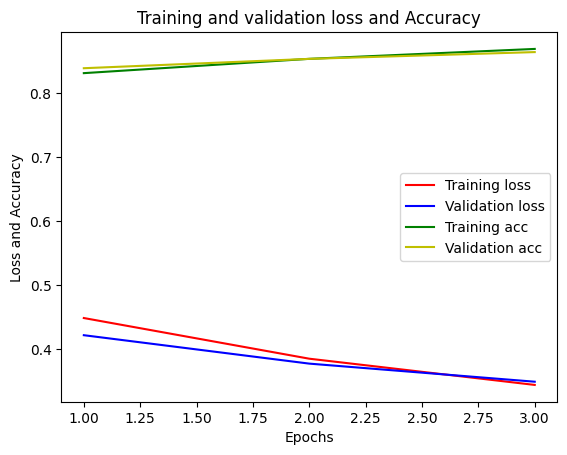

In [73]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()

plt.show()

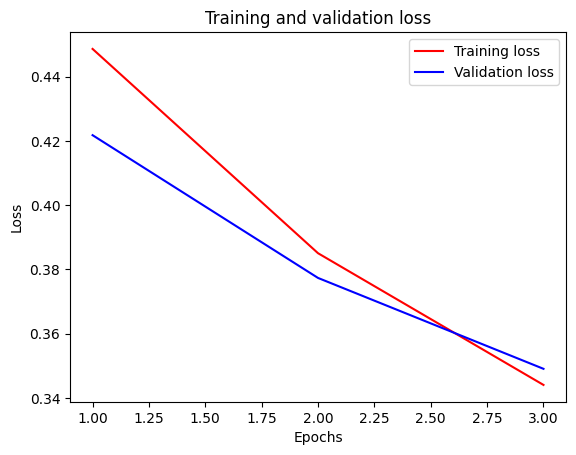

In [76]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

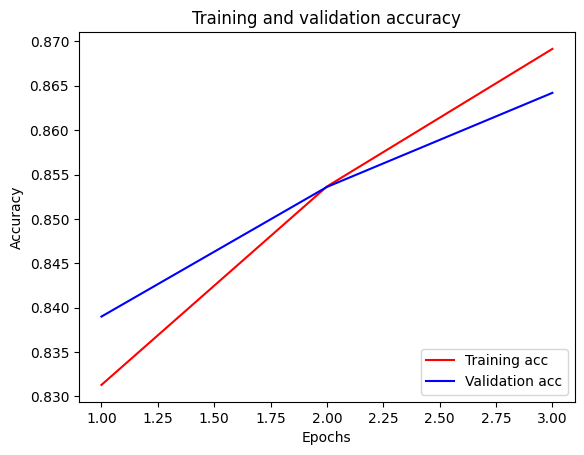

In [77]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss decreases with each epoch and the training accuracy increases with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak before the training accuracy. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.

For this particular case, you could prevent overfitting by simply stopping the training when the validation accuracy is no longer increasing. One way to do so is to use the tf.keras.callbacks.EarlyStopping callback.

Export the model
In the code above, you applied the TextVectorization layer to the dataset before feeding text to the model. If you want to make your model capable of processing raw strings (for example, to simplify deploying it), you can include the TextVectorization layer inside your model. To do so, you can create a new model using the weights you just trained.

In [78]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
metrics = export_model.evaluate(raw_test_ds, return_dict=True)
print(metrics)

782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 108ms/step - accuracy: 0.4992 - loss: 0.6167
{'accuracy': 0.5, 'loss': 0.6160348653793335}


Inference on new data

tf.constant creates a TensorFlow constant tensor, which is an immutable tensor that cannot be modified.
Syntax
tf.constant(value, dtype=None, shape=None, name=None)
Arguments
value: The initial value of the tensor.
dtype: The data type of the tensor (optional).
shape: The shape of the tensor (optional).
name: The name of the tensor (optional).

In [79]:
examples = tf.constant([
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
])

export_model.predict(examples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


array([[0.66090345],
       [0.63565505],
       [0.62270474]], dtype=float32)